In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load DataFrames

#### Most data wrangling already happened, during extraction from Google Sheets, with names changed in a git ignored piece of code

<center>df = `harvest_party_expenses.csv`</center>

In [2]:
# read in main expenses csv as a df
df = pd.read_csv('./static/resources/harvest_party_expenses.csv')
df.head()

,Name,Expense,Expense Amt,Date bought,Category
0,Randy Detman,Key chains,150,2017,Merch
1,Morning Glory,Liquor / Food / Costco,50,2017,Costco
2,Randy Detman,Cleaning service,60,2017,Cleaning
3,Randy Detman,Carpet cleaner,50,2017,Cleaning
4,Morning Glory,Brau kegs,140,2017,Bar


In [3]:
# convert all 'Expense Amt' to float with regex (remove $ and ,)
df['Expense Amt'] = df['Expense Amt'].replace('[\$,]', '', regex=True).astype(float)

# confirm all of 'Expense Amt' are floats
df.dtypes

Name            object
Expense         object
Expense Amt    float64
Date bought      int64
Category        object
dtype: object

In [4]:
# rename columns
df = df.rename(columns={'Expense Amt': 'Amount', 'Date bought': "Year"})
df

,Name,Expense,Amount,Year,Category
0,Randy Detman,Key chains,150.0,2017,Merch
1,Morning Glory,Liquor / Food / Costco,50.0,2017,Costco
2,Randy Detman,Cleaning service,60.0,2017,Cleaning
3,Randy Detman,Carpet cleaner,50.0,2017,Cleaning
4,Morning Glory,Brau kegs,140.0,2017,Bar
...,...,...,...,...,...
92,Randy Detman,Logo,200.0,2023,Logo
93,Latvia,Sid's shirts,50.0,2023,Merch
94,Watsonville,Cleaner Uber,20.0,2023,Cleaning
95,Bitter Barbie,New t-shirts advance payment,150.0,2023,Merch


##### Break the Costco Category up. One-third to Food, Two-thirds to Bar.

In [5]:
# Re-categorize Costco, giving 1/3 to Food, 2/3 to Bar
# food
df_food = df[df.Category == 'Costco'].copy()
df_food.Amount /= 3
df_food.Category = 'Food'
# bar
df_bar = df[df.Category == 'Costco'].copy()
df_bar.Amount *= 2/3
df_bar.Category = 'Bar'

# remove Costco from original df
df = df[df.Category != 'Costco']

# combine all dfs
df = pd.concat([df, df_food, df_bar], ignore_index=True)
df


,Name,Expense,Amount,Year,Category
0,Randy Detman,Key chains,150.000000,2017,Merch
1,Randy Detman,Cleaning service,60.000000,2017,Cleaning
2,Randy Detman,Carpet cleaner,50.000000,2017,Cleaning
3,Morning Glory,Brau kegs,140.000000,2017,Bar
4,Tom Brady,Plates/cups etc,50.000000,2017,Food
...,...,...,...,...,...
99,Morning Glory,"Costco Liquor / Plates / Paper Towels, TP, tra...",133.333333,2019,Bar
100,Randy Detman,Costco part 2,34.240000,2019,Bar
101,Randy Detman,Costco,178.773333,2021,Bar
102,Randy Detman,Costco,282.013333,2022,Bar


<center>po_df = `pay_outs.csv`</center>

In [6]:
# read in pay_outs csv as a df
po_df = pd.read_csv('./static/resources/pay_outs.csv')
po_df.head()

,Year,Name,Paid
0,2017,Randy Detman,646
1,2017,Watsonville,40
2,2017,Morning Glory,190
3,2017,Tom Brady,327
4,2018,Randy Detman,950


In [7]:
# convert all 'Paid' to float with regex (remove $ and ,)
po_df.Paid = po_df.Paid.replace('[\$,]', '', regex=True).astype(float)

# confirm all of 'Paid' are floats
po_df.dtypes

Year      int64
Name     object
Paid    float64
dtype: object

<center>don_df = `donations.csv`</center>

In [8]:
don_df = pd.read_csv('./static/resources/donations.csv')
don_df

,year,donations
0,2023,"$5,095.00"
1,2022,"$5,485.00"
2,2021,"$1,981.00"
3,2019,"$3,242.40"
4,2018,"$1,884.00"
5,2017,"$1,214.00"
6,2016,NaN
7,2015,NaN
8,2014,NaN


In [9]:
# convert all 'donations' to float with regex (remove $ and ,)
don_df.donations = don_df.donations.replace('[\$,]', '', regex=True).astype(float)

# confirm all of 'donations' are floats
don_df.dtypes

year           int64
donations    float64
dtype: object

In [10]:
don_df = don_df.rename(columns={'year': 'Year', 'donations': 'Donations'})
don_df.dropna(inplace=True)
don_df

,Year,Donations
0,2023,5095.0
1,2022,5485.0
2,2021,1981.0
3,2019,3242.4
4,2018,1884.0
5,2017,1214.0


<center>att_df = `attendees.csv`</center>

In [11]:
att_df = pd.read_csv('./static/resources/attendees.csv')
att_df

,year,facebook_going,facebook_maybes
0,2023,97,29
1,2022,100,40
2,2021,95,25
3,2019,194,85
4,2018,136,54
5,2017,156,76
6,2016,59,29
7,2015,127,49
8,2014,40,11


In [12]:
att_df.dtypes

year               int64
facebook_going     int64
facebook_maybes    int64
dtype: object

In [13]:
att_df = att_df.rename(columns={'year': 'Year', 'facebook_going': 'Going', 'facebook_maybes': 'Maybes'})
att_df

,Year,Going,Maybes
0,2023,97,29
1,2022,100,40
2,2021,95,25
3,2019,194,85
4,2018,136,54
5,2017,156,76
6,2016,59,29
7,2015,127,49
8,2014,40,11


#### Data wrangling complete

#### ------------

#### Describe the dfs

In [14]:
df.describe()

,Amount,Year
count,104.000000,104.000000
mean,179.052308,2020.250000
std,201.174648,2.171081
min,0.000000,2017.000000
25%,60.000000,2018.750000
50%,105.761667,2021.000000
75%,200.000000,2022.000000
max,950.000000,2023.000000


In [15]:
po_df.describe()

,Year,Paid
count,30.000000,30.000000
mean,2020.200000,616.597000
std,2.203446,533.797969
min,2017.000000,20.000000
25%,2019.000000,180.055000
50%,2019.000000,560.000000
75%,2022.000000,947.245000
max,2023.000000,2002.940000


In [16]:
don_df.describe()

,Year,Donations
count,6.000000,6.000000
mean,2020.000000,3150.233333
std,2.366432,1786.684104
min,2017.000000,1214.000000
25%,2018.250000,1908.250000
50%,2020.000000,2611.700000
75%,2021.750000,4631.850000
max,2023.000000,5485.000000


In [17]:
att_df.describe()

,Year,Going,Maybes
count,9.000000,9.000000,9.000000
mean,2018.333333,111.555556,44.222222
std,3.162278,47.579174,24.355583
min,2014.000000,40.000000,11.000000
25%,2016.000000,95.000000,29.000000
50%,2018.000000,100.000000,40.000000
75%,2021.000000,136.000000,54.000000
max,2023.000000,194.000000,85.000000


## Plots!

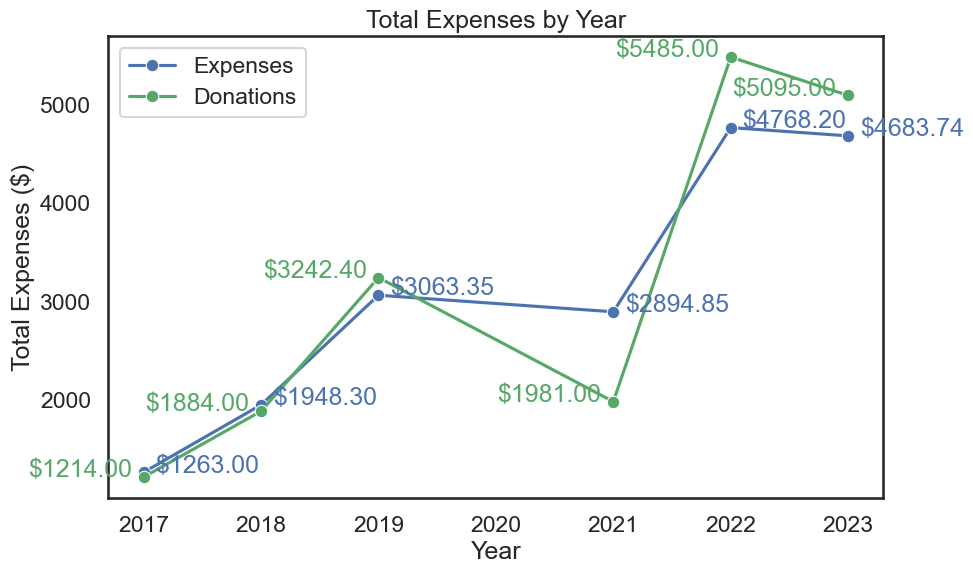

In [18]:
# plot expenses and donations by year as a line chart
sns.set(style="white", font="Arial", context="talk")
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Amount', data=df, estimator='sum', errorbar=None, marker='o', color='b')
sns.lineplot(x='Year', y='Donations', data=don_df, errorbar=None, marker='o', color='g')

# annotate each data point
df_sum = df.groupby('Year')['Amount'].sum()
for year, amount in df_sum.items():
    plt.text(year + 0.1, amount, f'${amount:.2f}', horizontalalignment='left', color='b')
for _, row in don_df.iterrows():
    year = row.Year
    amount = row.Donations
    plt.text(year - 0.1, amount, f'${amount:.2f}', horizontalalignment='right', color='g')

# format plot
plt.title('Total Expenses by Year')
plt.xlabel('Year')
plt.ylabel('Total Expenses ($)')
plt.legend(['Expenses', 'Donations'])
plt.show()


   Year  Expenses  Donations
0  2017   1263.00     1214.0
1  2018   1948.30     1884.0
2  2019   3063.35     3242.4
3  2021   2894.85     1981.0
4  2022   4768.20     5485.0
5  2023   4683.74     5095.0

    Year       Type   Amount
0   2017   Expenses  1263.00
1   2018   Expenses  1948.30
2   2019   Expenses  3063.35
3   2021   Expenses  2894.85
4   2022   Expenses  4768.20
5   2023   Expenses  4683.74
6   2017  Donations  1214.00
7   2018  Donations  1884.00
8   2019  Donations  3242.40
9   2021  Donations  1981.00
10  2022  Donations  5485.00
11  2023  Donations  5095.00


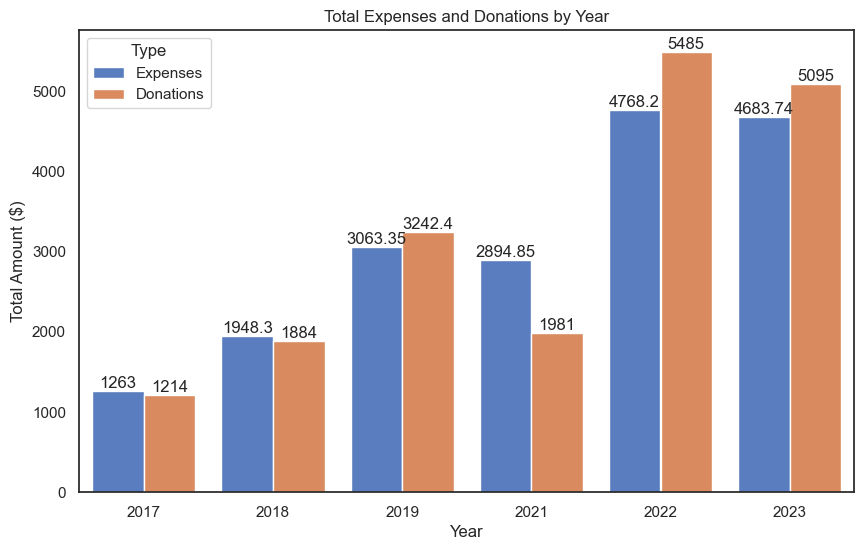

In [19]:
# grouped barchart of expenses and donations by year
df_sum = df.groupby('Year')['Amount'].sum().reset_index()
df_sum.columns = ['Year', 'Expenses']

don_sum = don_df.copy()

# merge expenses and donations dfs
df_sum = pd.merge(df_sum, don_sum, on='Year', how='outer')

# 'unpivot' the df (see print() output for before and after)
print(f'{df_sum}\n')
df_sum_melt = df_sum.melt('Year', var_name='Type', value_name='Amount')
print(df_sum_melt)

# plot grouped barchart
sns.set(style="white", font="Arial")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Amount', hue='Type', data=df_sum_melt, palette='muted')

# add labels
for container in ax.containers:
    ax.bar_label(container)

# format plot
plt.title('Total Expenses and Donations by Year')
plt.xlabel('Year')
plt.ylabel('Total Amount ($)')
plt.legend(title='Type')
plt.show()

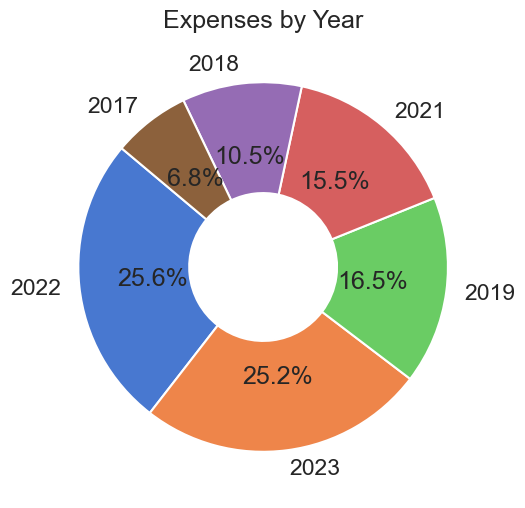

In [20]:
# plot total expenses by year as a donut chart
# group and sort sums by year
df_sum = df.groupby('Year')['Amount'].sum().reset_index()
df_sum = df_sum.sort_values('Amount', ascending=False)

# plot and format donut chart
sns.set(style="white", font="Arial", context="talk")
plt.figure(figsize=(10, 6))
plt.pie(df_sum.Amount, labels=df_sum.Year, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'), wedgeprops=dict(width=0.6, edgecolor='w'))
plt.title('Expenses by Year')
plt.show()

<Figure size 1000x600 with 0 Axes>

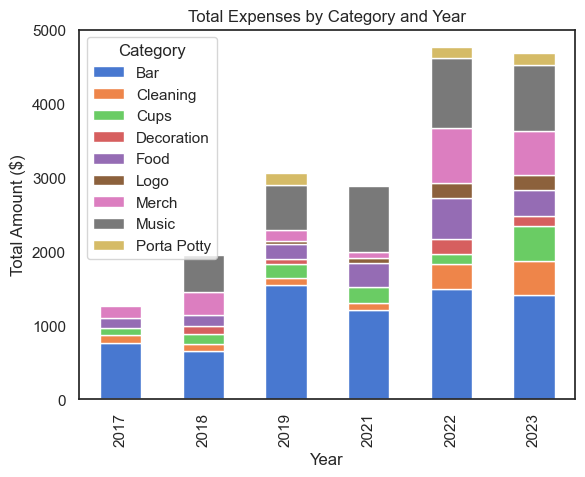

In [21]:
# plot a grouped bar chart of expenses by category, per year
df_cat = df.groupby(['Year', 'Category'])['Amount'].sum().reset_index()
df_cat = df_cat.pivot(index='Year', columns='Category', values='Amount').reset_index()
df_cat = df_cat.fillna(0)

# plot the chart
sns.set(style="white", font="Arial")
plt.figure(figsize=(10, 6))
ax = df_cat.plot(x='Year', kind='bar', stacked=True, color=sns.color_palette('muted'))

# format plot
plt.title('Total Expenses by Category and Year')
plt.xlabel('Year')
plt.ylabel('Total Amount ($)')
plt.legend(title='Category')
plt.show()

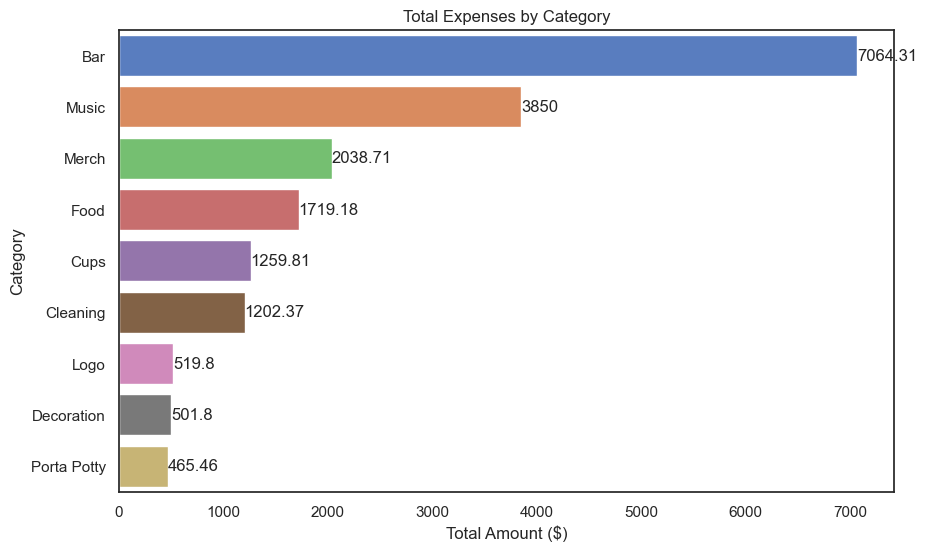

In [22]:
# plot a bar chart of total expenses by category
# group and sort Amount by Category
df_cat_sum = df.groupby('Category')['Amount'].sum().reset_index()
df_cat_sum = df_cat_sum.sort_values('Amount', ascending=False)

# plot the chart
sns.set(style="white", font="Arial")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Amount', y='Category', data=df_cat_sum, palette='muted')

# add labels
for container in ax.containers:
    ax.bar_label(container)

# format plot
plt.title('Total Expenses by Category')
plt.xlabel('Total Amount ($)')
plt.ylabel('Category')
plt.show()